<a href="https://colab.research.google.com/github/nezz244/Deployoment-of-machine-learning-algorithms-For-machine-vision-inspection-systems/blob/main/Transfer_learning_using_keras_resnet_50_on_bottles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive'
data_dir= '/content/gdrive/MyDrive/Bottles/'
#random_data_dir= '/content/gdrive/MyDrive/'
test_speed= '/content/gdrive/MyDrive/3000images/*'

MyDrive  Othercomputers


In [ ]:
print(data_dir)
print(test_speed)

/content/gdrive/MyDrive/Bottles/
/content/gdrive/MyDrive/3000images/*


In [ ]:
Wine = glob(data_dir +'Wine/*')
Water= glob(data_dir + 'Water/*')
#soda= glob(data_dir + 'Soda/*')
Plastic= glob(data_dir + 'Plastic/*')
Beer= glob(data_dir + 'Beer/*')
bottles=glob(test_speed)
#random= glob(random_data_dir + 'random/*')

#(Wine[2])
#PIL.Image.open(str(Water[2]))

In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20030 files belonging to 4 classes.
Using 16024 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20030 files belonging to 4 classes.
Using 4006 files for validation.


In [ ]:

class_names = train_ds.class_names
print(class_names)

['Beer', 'Plastic ', 'Water ', 'Wine ']


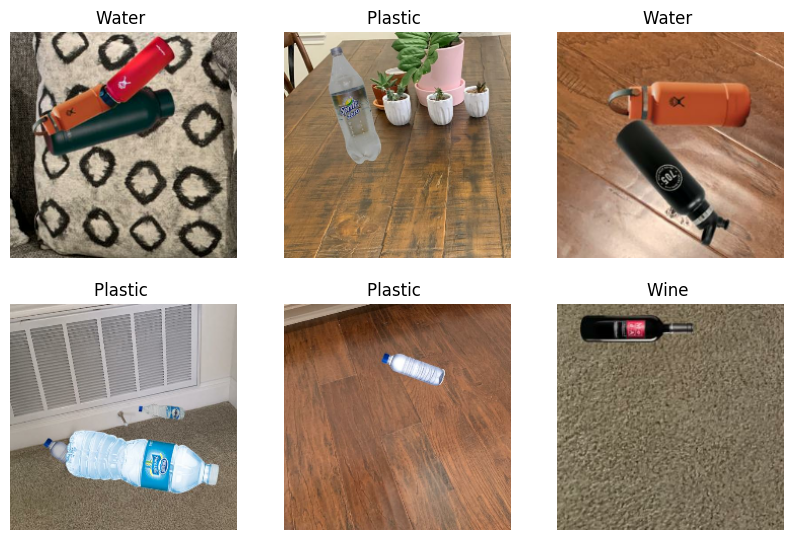

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(500, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:

resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 500)               1024500   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 4)                 2004      
 apper)                                                          
                                                                 
Total params: 24614216 (93.90 MB)
Trainable params: 1026504 (3.92 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0003),loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [ ]:


epochs=1
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/5
501/501 [==============================] - 4784s 9s/step - loss: 0.1131 - accuracy: 0.9589 - val_loss: 0.1064 - val_accuracy: 0.9638
Epoch 2/5
342/501 [===================>..........] - ETA: 18:24 - loss: 0.0430 - accuracy: 0.9857

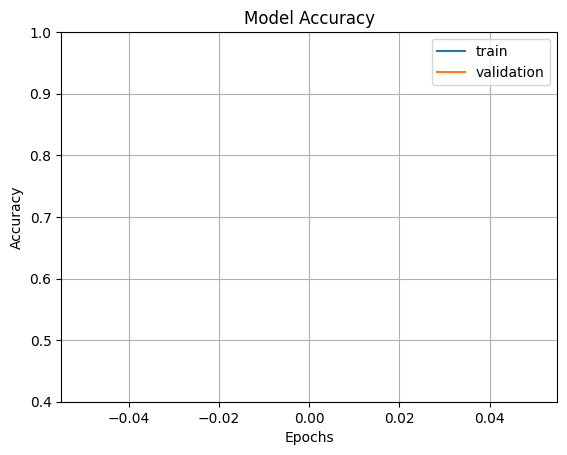

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

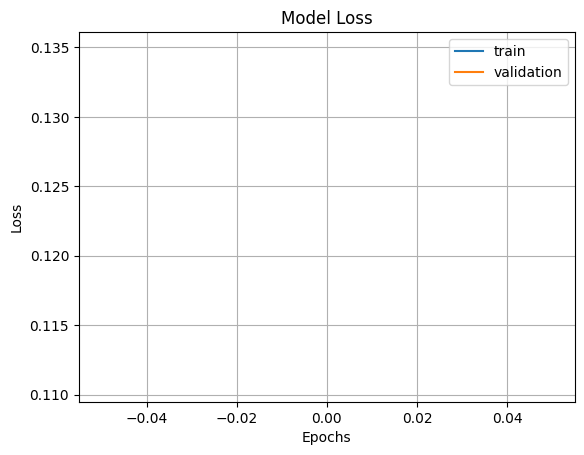

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
converter= tf.lite.TFLiteConverter.from_keras_model(resnet_model)
tflite_model = converter.convert()

with open("bottlemodel.tflite", "wb") as f:
  f.write(tflite_model)


In [ ]:
import sys
import cv2

count=0



image=cv2.imread(str(bottles[1]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
    #print(image.shape)
pred=resnet_model.predict(image)
    #print(pred)
output_class=class_names[np.argmax(pred)]
    #print("The predicted class is", output_class)










In [ ]:
PIL.Image.open(str(Wine[3]))